# Probleme de regresie folosind algoritmul Gradient Descent <img src="images/regression.png" width="100">

## Obiective
* rezolvarea unor probleme de regresie liniara
* folosirea unor algoritmi liniari bazati pe metoda gradientului descrescator
* normalizarea datelor (atributelor datelor)

## Cuvinte cheie:
* date de antrenare si date de testare 
* atribute/catacteristici ale datelor
* normalizare date 
* model de regresie liniar
* eroarea de predictie

## Aspecte teoretice


Problemele de regresie identifica relatia de dependenta intre datele de iesire si datele de intrare ale unui probleme, adica pe baza unor caracteristici a datelor se doreste prezicearea unor valori asociate acestor date. Valorile prezise sunt de tip continu. 

<details>
  <summary>Remember the theory behind regression</summary>
 

Relatia de dependenta poate fi:
- liniara (tema abordata in acest laborator)
- ne-liniara (tema abordata in alt laborator)

### Exemple de probleme de regresie:
- predictia actiunilor la bursa in functie de anumiti indicatori economici 
- predictia consumului de inghetata in functie de temperatura si de numarul de copii dintr-o tabara

### Formalizare problema de regresie liniara:

- datele se caracterizeaza prin $atribute$ ($x = (x_1, x_2, ..., x_3)$) si $output$ (atat atributele, cat si outputul sunt valori numerice continue)
* modelul (liniar) de predictie (regresorul): $y = f(x, w) = w_0 + w_1 * x_1 + w_2 * x_2 + ...$ 

### Metodologia rezolvarii unei probleme de regresie (liniara)

**Antrenare** 

> Input: 

un set de exemple etichetate $(x^i, y^i)$, cu $i \in \{1, 2, ..., n\}$, $x^i$ - vectorul de atribute asociate unui exemplu, $y^i$ etichetata asociata exemplului $x^i$ (valoare numerica reala/float), $n$ is the size of the training data (no of training examples)

> Output: 

un model de regresie, adica valorile optime ale coeficientilor $w$ din ecuatia de regresie 

$$f(x, w) = w_0 + w_1 * x_1 + w_2 * x_2 + ...$$

> Algoritm: 

- metoda celor mai mici patrate ($Least Square$) - in laboratorul trecut :)
- $Gradient Descent$ - in laboratorul de azi :)

**Testare** 

> Input: 

un exemplu ne-etichetat $(x_{new})$, cu $x_{new}$ - vectorul de atribute asociate acelui exemplu

> Output: 

valoarea prezisa pentru exemplul $x_{new}$

> Algoritm:

Folosirea regresorului invatat (a coeficientilor) pentru a calcula valoarea outputului
$$y_{new} = f(x_{new}, w)$$

**Metoda de gradient descrescator**

Presupunem cazul unei regresii multi-variate ($m$ atribute): $f(x,w) = w_0 + w_1 * x_1 + w_2 * x_2 + ... w_m * x_m$.
Se doreste identificarea valorilor optime pentru coeficientii **w**=$[w_0, w_1, ...]$ stiindu-se un set de $n$ exemple de antrenament de forma $(x^i, y^i)$, cu $i = 1, 2, ..., n$, $x^i = (x^i_1, x^i_2, ..., x^i_m)$.



>Input: 
- datele de antrenament: $(x^i, y^i)$, $i = 1, 2, ..., n$,
- parametrii algoritmului GD: rata de invatare ($\eta$), numarul de iteratii/epoci

>Output:
- valorile optime ale coeficientilor $w$

>Algoritm - versiunea stocastica:
- se initializeaza cei $m + 1$ coeficienti **w** cu 0 (sau cu valori reale oarecare din $[0, 1]$)
- se repeta (pentru un numar de iteratii/epoci):
    - pentru fiecare exemplu $x^i$ din $x$ ($i = 1, 2, ..., n$):
        - se estimeaza valoarea lui $y^i$: $y^i_{computed} = f(x^i, w)$
        - se stabileste eroarea intre estimarea lui $y^i$ si valoarea reala/corecta a lui $y$ ($err = y^i_{computed} - y^i$)
        - se modifica/imbunatatesc coeficientii $w$ tinand cont de eroare si de rata de invatare
        $$\boldsymbol{w}{'} = \boldsymbol{w} - \eta * err * x^i$$ 


### Evaluarea performantei regresorului 

- eroarea - a se vedea laboratorul 6 (ML eval)

</details>

## Exemple

### Demo1 - single-variate regression


#### Problemă: Ce îi poate face pe oameni fericiți?
Se consideră problema predicției gradului de fericire a populației globului folosind informații despre diferite caracteristici a bunăstării respectivei populații precum Produsul intern brut al țării în care locuiesc (gross domestic product – GBP), gradul de libertate, etc. 

Folsind datele aferente anului 2017 link, să se realizeze o predicție a gradului de fericire în funcție:
-	doar de Produsul intern brut 

**Metodologie pentru aplicarea GD pentru estimarea fericirii**

Tipuri de regresie:
- univariata – flow similar cu lab-ul precedent: $Happiness = f(GDP) = w_0 + w_1 * GDP$


Algoritm de regresie:
- Live: SGDRegressor din sklearn [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)
- Live: SGDRegressor propriu 

Pasi in rezolvare:
- plot pt distributia datelor & plot pt “verificarea” liniaritatii (daca legatura intre y si x e una liniara)
- impartire date pe train si test
- invatare model (cu tool de GD sau cu cod propriu)
- plot rezultate
- calcul metrici de performanta (eroarea)


In [6]:
import warnings; warnings.simplefilter('ignore')
import csv
import matplotlib.pyplot as plt 
import numpy as np 


#### Pasul 1 - plot pt distributia datelor & plot pt “verificarea” liniaritatii (daca legatura intre y si x e una liniara)

In [7]:
# Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that output variable (y) can be calculated from a linear combination of the input variables (x).
# Univariate Linear Regression is a linear regression that has only one input parameter and one output label.

# consider the following regression problem:
# estimate how happiness is influenced by gross domestic product (GDP) per capita. Use 2017 data from ![here](https://www.kaggle.com/unsdsn/world-happiness#2017.csv) 

# load data and consider a single feature (Economy..GDP.per.capita) and the output to be estimated (happiness)


def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]
    
    return inputs, outputs

import os

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])



in:   [1.61646318435669, 1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327]
out:  [7.53700017929077, 7.52199983596802, 7.50400018692017, 7.49399995803833, 7.4689998626709]


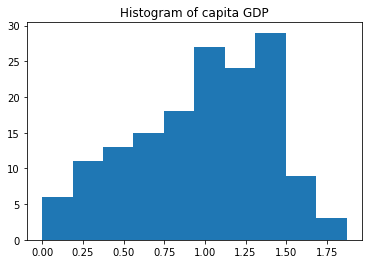

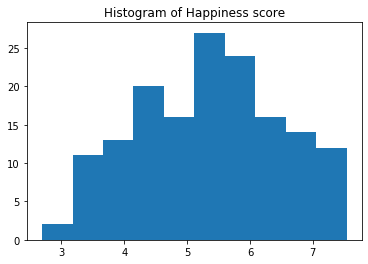

In [8]:
# see how the data looks (plot the histograms associated to input data - GDP feature - and output data - happiness)

def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram(inputs, "capita GDP")
plotDataHistogram(outputs, "Happiness score")

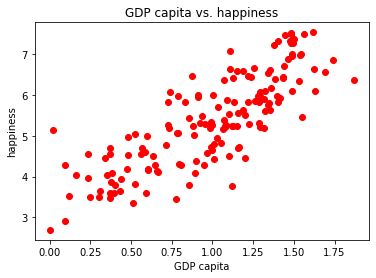

In [9]:
# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)

plt.plot(inputs, outputs, 'ro') 
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('GDP capita vs. happiness')
plt.show()


#### Pasul 2 - impartire date pe train si test

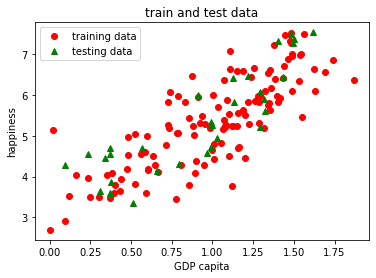

In [10]:

# Split the Data Into Training and Test Subsets
# In this step we will split our dataset into training and testing subsets (in proportion 80/20%).

# Training data set is used for training the linear model. Testing dataset is used for validating of the model. All data from testing dataset will be new to  model and we may check how accurate are model predictions.

np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')   #train data are plotted by red and circle sign
plt.plot(testInputs, testOutputs, 'g^', label = 'testing data')     #test data are plotted by green and a triangle sign
plt.title('train and test data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()


#### Pasul 3 - invatare model (cu tool sau cod propriu)

In [11]:
# learning step: init and train a linear regression model y = f(x) = w0 + w1 * x
# Prediction step: used the trained model to estimate the output for a new input


# training data preparation (the sklearn linear model requires as input training data as noSamples x noFeatures array; in the current case, the input must be a matrix of len(trainInputs) lineas and one columns (a single feature is used in this problem))
xx = [[el] for el in trainInputs]

# # using sklearn 
# from sklearn import linear_model
# # model initialisation
# regressor = linear_model.SGDRegressor(alpha = 0.01, max_iter = 100)
# # training the model by using the training inputs and known training outputs
# regressor.fit(xx, trainOutputs)
# # save the model parameters
# w0, w1 = regressor.intercept_[0], regressor.coef_[0]
# print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

# using developed code
from SGD import MySGDRegression 

# model initialisation
regressor = MySGDRegression()
# training the model by using the training inputs and known training outputs
regressor.fit(xx, trainOutputs)
# save the model parameters
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')




the learnt model: f(x) =  3.1994285956915123  +  2.1487678365481915  * x


#### Pasul 4 - plot rezultate (model invatat, predictii)

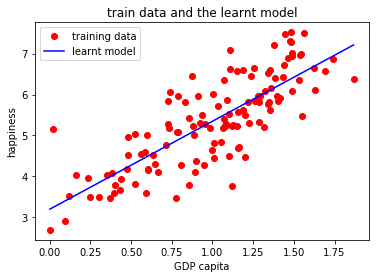

In [12]:

# plot the learnt model
# prepare some synthetic data (inputs are random, while the outputs are computed by the learnt model)
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref] 

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  #train data are plotted by red and circle sign
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

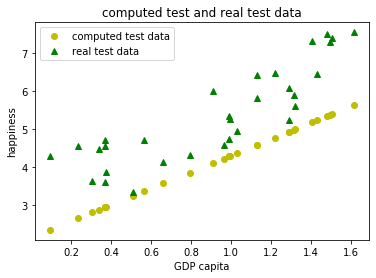

In [13]:
# use the trained model to predict new inputs

# makes predictions for test data (manual)
# computedTestOutputs = [w0 + w1 * el for el in testInputs]
# makes predictions for test data (by tool)
computedTestOutputs = regressor.predict([[x] for x in testInputs])

# plot the computed outputs (see how far they are from the real outputs)
plt.plot(testInputs, computedTestOutputs, 'yo', label = 'computed test data')  #computed test data are plotted yellow red and circle sign
plt.plot(testInputs, testOutputs, 'g^', label = 'real test data')  #real test data are plotted by green triangles
plt.title('computed test and real test data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

#### Pasul 5 - calcul metrici de performanta (eroarea)

In [14]:
#compute the differences between the predictions and real outputs
# "manual" computation
error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)
print('prediction error (manual): ', error)

# by using sklearn 
from sklearn.metrics import mean_squared_error

error = mean_squared_error(testOutputs, computedTestOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  1.9008773201208433
prediction error (tool):   1.9008773201208433


#### Toti pasii impreuna

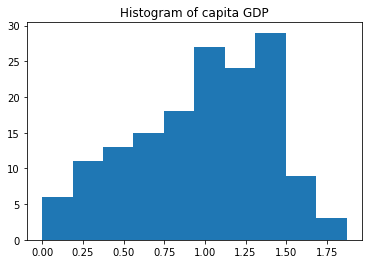

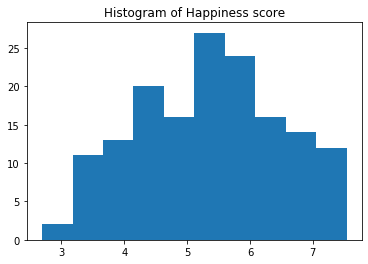

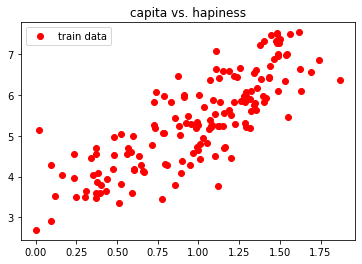

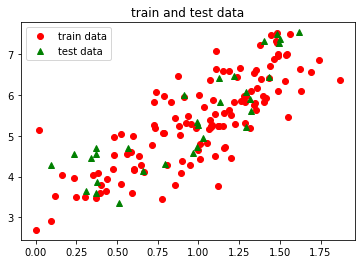

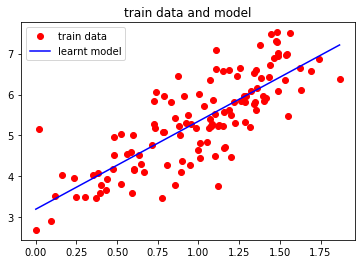

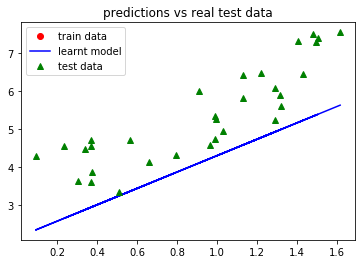

prediction error (manual):  1.9008773201208433
prediction error (tool):  1.9008773201208433


In [16]:
# put all steps togheter

def plotData(x1, y1, x2 = None, y2 = None, x3 = None, y3 = None, title = None):
    plt.plot(x1, y1, 'ro', label = 'train data')
    if (x2):
        plt.plot(x2, y2, 'b-', label = 'learnt model')
    if (x3):
        plt.plot(x3, y3, 'g^', label = 'test data')
    plt.title(title)
    plt.legend()
    plt.show()

def univariateRegression():
    import os

    crtDir =  os.getcwd()
    filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

    inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')

    plotDataHistogram(inputs, 'capita GDP')
    plotDataHistogram(outputs, 'Happiness score')

    # check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)
    plotData(inputs, outputs, [], [], [], [], 'capita vs. hapiness')

    # split data into training data (80%) and testing data (20%)
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
    testSample = [i for i in indexes  if not i in trainSample]
    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]

    plotData(trainInputs, trainOutputs, [], [], testInputs, testOutputs, "train and test data")

    # training step
    xx = [[el] for el in trainInputs]
    # regressor = linear_model.SGDRegressor(max_iter =  10000)
    regressor = MySGDRegression()
    regressor.fit(xx, trainOutputs)
    w0, w1 = regressor.intercept_, regressor.coef_[0]
    
    # plot the model
    noOfPoints = 1000
    xref = []
    val = min(trainInputs)
    step = (max(trainInputs) - min(trainInputs)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref] 
    plotData(trainInputs, trainOutputs, xref, yref, [], [], title = "train data and model")
    
    #makes predictions for test data
    # computedTestOutputs = [w0 + w1 * el for el in testInputs]
    #makes predictions for test data (by tool)
    computedTestOutputs = regressor.predict([[x] for x in testInputs])
    plotData([], [], testInputs, computedTestOutputs, testInputs, testOutputs, "predictions vs real test data")

    #compute the differences between the predictions and real outputs
    error = 0.0
    for t1, t2 in zip(computedTestOutputs, testOutputs):
        error += (t1 - t2) ** 2
    error = error / len(testOutputs)
    print("prediction error (manual): ", error)

    error = mean_squared_error(testOutputs, computedTestOutputs)
    print("prediction error (tool): ", error)

univariateRegression()

### Demo2 - Bi-variate regression




#### Problemă: Ce îi poate face pe oameni fericiți?
Se consideră problema predicției gradului de fericire a populației globului folosind informații despre diferite caracteristici a bunăstării respectivei populații precum Produsul intern brut al țării în care locuiesc (gross domestic product – GBP), gradul de libertate, etc. 

Folsind datele aferente anului 2017 link, să se realizeze o predicție a gradului de fericire în funcție:
-	de Produsul intern brut si de gradul de libertate.

**Metodologie pentru aplicarea GD pentru estimarea fericirii**

Tipuri de regresie:
*	univariata – flow similar cu lab-ul precedent: $Happiness = f(GDP) = w_0 + w_1 * GDP$ (Demo1)
*	bivariata – flow similar cu lab-ul precedent, dar apare in plus necesitatea normalizarii datelor (DGP-ul si Freedom-ul pot avea unitati de masura diferite): $Happiness = f(GDP, Freedom) = w_0 + w_1 * GDP * w_2 * Freedom$  

Normalizare datelor pt $GDP$ si $Freedom$ din regresia bivariata $Happiness = f(GDP, Freedom) = w0 + w1 * GDP * w2 * Freedom$ folosind tool-ul $StandardScaler$ din $sklearn$ [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

Algoritm de regresie:
* Live: SGDRegressor din sklearn [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)
* Live: SGDRegressor propriu 

#### Pasul 1 - plot pt distributia datelor & plot pt “verificarea” liniaritatii (daca legatura intre y si x e una liniara)

In [19]:
import csv
import os

from sklearn.preprocessing import StandardScaler
from math import sqrt




In [ ]:
def plot3Ddata(x1Train, x2Train, yTrain, x1Model = None, x2Model = None, yModel = None, x1Test = None, x2Test = None, yTest = None, title = None):
    from mpl_toolkits import mplot3d
    ax = plt.axes(projection = '3d')
    if (x1Train):
        plt.scatter(x1Train, x2Train, yTrain, c = 'r', marker = 'o', label = 'train data') 
    if (x1Model):
        plt.scatter(x1Model, x2Model, yModel, c = 'b', marker = '_', label = 'learnt model') 
    if (x1Test):
        plt.scatter(x1Test, x2Test, yTest, c = 'g', marker = '^', label = 'test data')  
    plt.title(title)
    ax.set_xlabel("capita")
    ax.set_ylabel("freedom")
    ax.set_zlabel("happiness")
    plt.legend()
    plt.show()

In [ ]:
def loadDataMoreInputs(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable1 = dataNames.index(inputVariabNames[0])
    selectedVariable2 = dataNames.index(inputVariabNames[1])
    inputs = [[float(data[i][selectedVariable1]), float(data[i][selectedVariable2])] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]
    
    return inputs, outputs

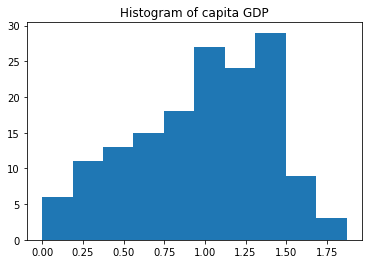

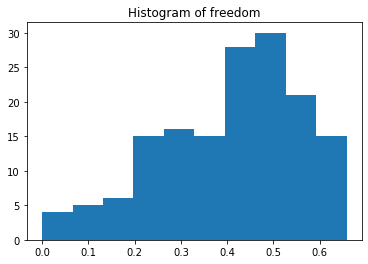

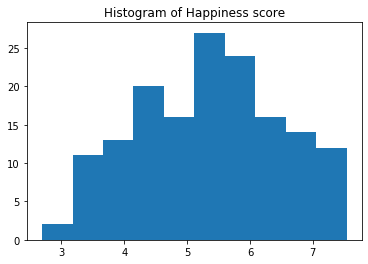

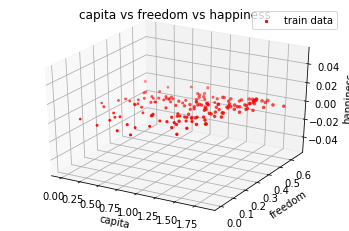

In [17]:
# problem hapiness = w0 + w1 * GDPcapita + w2 * freedom
# load data
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

inputs, outputs = loadDataMoreInputs(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

feature1 = [ex[0] for ex in inputs]
feature2 = [ex[1] for ex in inputs]

# plot the data histograms
plotDataHistogram(feature1, 'capita GDP')
plotDataHistogram(feature2, 'freedom')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variables (x1 = capita, x2 = freedom).)
plot3Ddata(feature1, feature2, outputs, [], [], [], [], [], [], 'capita vs freedom vs happiness')


#### Pasul 2 - impartire date pe train si test si normalizare

In [20]:
def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]
        
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
        
        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData




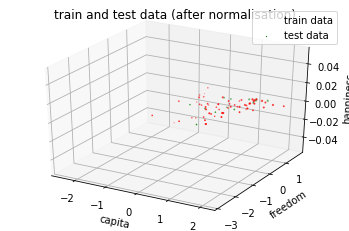

In [21]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]


trainInputs, testInputs = normalisation(trainInputs, testInputs)
trainOutputs, testOutputs = normalisation(trainOutputs, testOutputs)

feature1train = [ex[0] for ex in trainInputs]
feature2train = [ex[1] for ex in trainInputs]

feature1test = [ex[0] for ex in testInputs]
feature2test = [ex[1] for ex in testInputs]

plot3Ddata(feature1train, feature2train, trainOutputs, [], [], [], feature1test, feature2test, testOutputs, "train and test data (after normalisation)")


#### Pasul 3 - invatare model (cu tool sau cod propriu)

In [23]:
# identify (by training) the regressor

# # use sklearn regressor
# from sklearn import linear_model
# regressor = linear_model.SGDRegressor()

# using developed code
from SGD import MySGDRegression 
# model initialisation
regressor = MySGDRegression()

regressor.fit(trainInputs, trainOutputs)
# print(regressor.coef_)
# print(regressor.intercept_)

#parameters of the liniar regressor
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x1 + ', w2, ' * x2' )

the learnt model: f(x) =  -0.0014527924544318889  +  0.6978631617347402  * x1 +  0.30375393537641193  * x2


#### Pasul 4 - plot rezultate (model invatat, predictii)

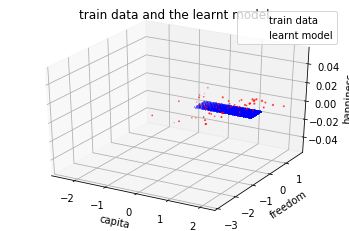

In [24]:

#numerical representation of the regressor model
noOfPoints = 50
xref1 = []
val = min(feature1)
step1 = (max(feature1) - min(feature1)) / noOfPoints
for _ in range(1, noOfPoints):
    for _ in range(1, noOfPoints):
        xref1.append(val)
    val += step1

xref2 = []
val = min(feature2)
step2 = (max(feature2) - min(feature2)) / noOfPoints
for _ in range(1, noOfPoints):
    aux = val
    for _ in range(1, noOfPoints):
        xref2.append(aux)
        aux += step2
yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]
plot3Ddata(feature1train, feature2train, trainOutputs, xref1, xref2, yref, [], [], [], 'train data and the learnt model')

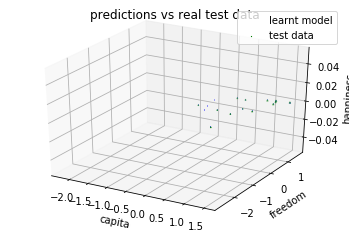

In [25]:
# use the trained model to predict new inputs

# makes predictions for test data
# computedTestOutputs = [w0 + w1 * el[0] + w2 * el[1] for el in testInputs]
# makes predictions for test data (by tool)
computedTestOutputs = regressor.predict(testInputs)

plot3Ddata([], [], [], feature1test, feature2test, computedTestOutputs, feature1test, feature2test, testOutputs, 'predictions vs real test data')

#### Pasul 5 - calcul metrici de performanta (eroarea)

In [26]:

#compute the differences between the predictions and real outputs
error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)
print('prediction error (manual): ', error)

from sklearn.metrics import mean_squared_error

error = mean_squared_error(testOutputs, computedTestOutputs)
print('prediction error (tool):   ', error)


prediction error (manual):  0.2331793993161317
prediction error (tool):    0.23317939931613166



## Tema



**Ce îi poate face pe oameni fericiți?** 
Se consideră problema predicției gradului de fericire a populației globului folosind informații despre diferite caracteristici a bunăstării respectivei populații precum Produsul intern brut al țării în care locuiesc (gross domestic product – GBP), gradul de fericire, etc. 

Folsind datele aferente anului 2017 [link](https://www.kaggle.com/unsdsn/world-happiness#2017.csv), să se realizeze o predicție a gradului de fericire în funcție:
-	doar de Produsul intern brut 
-	de Produsul intern brut si de gradul de libertate.

Să se rezolve problema, implementându-se rutine pentru:
-	gradient descrescător bazat pe batch-uri – cu tool sau cu cod propriu
    -   parametrizare a SGDRegressor din sklearn [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) astfel incat sa efectueze Batch GD
    - implementare proprie a Batch GD

-	normalizarea datelor de antrenament și test (cu cod propriu) - implementare proprie pentru normalizarea statistica a datelor din problema de regresie bivariata ($GDP$, $Freedom$ si $Happiness$)
    - Step1: Identificare parametrii normalizare (mean, stdDev) pt setul de train
    - Step2: Normalizarea datelor din train folosind parametrii mean si stdDev (de la pasul 1)
    - Step3: Normalziarea datelor din test folosind parametrii mean si stdDev (de la pasul 1)


## Tema optionala



Rezolvarea unei probleme de regresie prin:
* implementarea unui algoritm GD non-liniar
* implementare regresie multi-target (cu mai multe output-uri) – sugestii:
    - outputurile sa fie independente (de ex pe setul de date din sklearn.datasets pot folosi datele psyho din linnerud)
    - outputurile sa fie dependente (aici s-ar putea folosi un regressor gata antrenat – gen yolo [link](https://pjreddie.com/darknet/yolo/) pentru a prezice coordonatele bounding box-urilor care incadreaza obiectele recunoscute in imagini; trebuie studiat cum se evalueaza daca acele BBs sunt bune sau nu; focusul e de fapt pe interpretarea outputului dat de regressor, nu pe modul in care se antreneaza regressorul) 

